<a href="https://colab.research.google.com/github/ab-sa/Statistical-Machine-Learning3/blob/main/Lecture_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
#import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline

Import Credit data

In [2]:
Credit = pd.read_csv('Credit.csv')
print('Dimension of the data: ' + str(Credit.shape))
Credit.head()

Dimension of the data: (400, 12)


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [14]:
print(pd.concat([Credit['Gender'].value_counts(),
                 Credit['Gender'].value_counts(normalize=True)],
                axis=1))
print(pd.concat([Credit['Student'].value_counts(),
                 Credit['Student'].value_counts(normalize=True)],
                axis=1))
print(pd.concat([Credit['Married'].value_counts(),
                 Credit['Married'].value_counts(normalize=True)],
                axis=1))
print(pd.concat([Credit['Ethnicity'].value_counts(),
                 Credit['Ethnicity'].value_counts(normalize=True)],
                axis=1))

        Gender  Gender
Female     207  0.5175
 Male      193  0.4825
     Student  Student
No       360      0.9
Yes       40      0.1
     Married  Married
Yes      245   0.6125
No       155   0.3875
                  Ethnicity  Ethnicity
Caucasian               199     0.4975
Asian                   102     0.2550
African American         99     0.2475


In [16]:
Credit_dumms = pd.get_dummies(Credit, drop_first=True)
Credit_dumms.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,2,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,3,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,4,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,5,55.882,4897,357,2,68,16,331,0,0,1,0,1


PCR

[95754.03181385437, 95318.2280441656, 90520.99576225704, 90521.38124039189, 89469.84459034126, 77941.38747590946, 72938.20335020867, 72879.38919402966, 72774.06716643825, 75871.93794688542, 11509.49120371135, 11486.467817603676, 11486.467817603676, 11486.467817603676, 11486.467817603676]


Text(0, 0.5, 'MSPE')

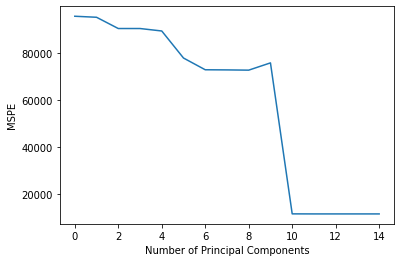

In [32]:
y = Credit_dumms['Balance']
X = Credit_dumms.drop(['ID', 'Balance'], axis=1)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

pca = PCA()
PCs_train = pca.fit_transform(X_train_std)
PCs_test = pca.transform(X_test_std)

LModel = linear_model.LinearRegression()
MSPEs = []

# Calculate MSPE with only the intercept
#LModel.fit(np.ones((len(PCs_train),1)), y_train)
#MSPEs.append(mean_squared_error(y_test, LModel.predict(np.ones((len(PCs_test),1)))))

# Calculate MSPE: adding one component at a time
for i in np.arange(1, 16):
  LModel.fit(PCs_train[:,:i], y_train)
  MSPEs.append(mean_squared_error(y_test, LModel.predict(PCs_test[:,:i])))

print(MSPEs)

# Plot MSPEs results    
plt.plot(MSPEs)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSPE')

In [29]:
LModel.fit(PCs_train[:,:10], y_train)
print('MSPE: ', mean_squared_error(y_test, LModel.predict(PCs_test[:,:10])))
print('Coef estimatees: ', LModel.coef_)

MSPE:  11483.550588784083
Coef estimatees:  [ 212.12191134   13.65003537   47.80370314  -21.65221619  -13.79594211
  107.19373811   11.94400799   21.30716584  -69.74846406 -451.17644105]


Create dummy variavles and initialize 10-fold CV

In [30]:
# from numpy.core.fromnumeric import shape
Credit_dumms['CV'] = np.random.randint(low=0, high=10, size=(Credit_dumms.shape[0],))
print(Credit_dumms['CV'].value_counts())
print(Credit_dumms.isnull().sum())
Credit_dumms

3    47
5    45
2    43
4    40
7    39
8    39
9    39
0    39
6    35
1    34
Name: CV, dtype: int64
ID                     0
Income                 0
Limit                  0
Rating                 0
Cards                  0
Age                    0
Education              0
Balance                0
Gender_Female          0
Student_Yes            0
Married_Yes            0
Ethnicity_Asian        0
Ethnicity_Caucasian    0
CV                     0
dtype: int64


,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,CV
0,1,14.891,3606,283,2,34,11,333,0,0,1,0,1,3
1,2,106.025,6645,483,3,82,15,903,1,1,1,1,0,4
2,3,104.593,7075,514,4,71,11,580,0,0,0,1,0,5
3,4,148.924,9504,681,3,36,11,964,1,0,0,1,0,3
4,5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,560,0,0,1,0,1,8
396,397,13.364,3838,296,5,65,17,480,0,0,0,0,0,5
397,398,57.872,4171,321,5,67,12,138,1,0,1,0,1,6
398,399,37.728,2525,192,1,44,13,0,0,0,1,0,1,5


Model comparison:

In [31]:
Ridge_MSPE = []
LASSO_MSPE = []
LASSO_NFeat = []
PCR_MSPE = []
PCR_NCopm = []
PLS_MSPE = []
PLS_NCopm = []

for i in range(10):
  Credit_dumms_train = Credit_dumms.loc[Credit_dumms['CV'] != i]
  Credit_dumms_test = Credit_dumms.loc[Credit_dumms['CV'] == i]

  y_train = Credit_dumms_train['Balance']
  X_train = Credit_dumms_train.drop(['ID', 'Balance', 'CV'], axis=1)
  y_test = Credit_dumms_test['Balance']
  X_test = Credit_dumms_test.drop(['ID', 'Balance', 'CV'], axis=1)

  std_scale = StandardScaler().fit(X_train)
  X_train_std = std_scale.transform(X_train)
  X_test_std  = std_scale.transform(X_test)

  CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

  # Ridge
  LMRidgeCV = RidgeCV(alphas=np.arange(0.5, 2, 0.01), cv=CV10, scoring='neg_mean_squared_error')
  LMRidgeCV.fit(X_train_std, y_train)
  LMRidge = Ridge(alpha = LMRidgeCV.alpha_)
  LMRidge.fit(X_train_std, y_train)
  Ridge_MSPE.append(mean_squared_error(y_test, LMRidge.predict(X_test_std)))

  # LASSO
  LMLassoCV = LassoCV(alphas = np.arange(0.5, 2, 0.01), cv = CV10, max_iter = 1000)
  LMLassoCV.fit(X_train_std, y_train)
  LMLasso = Lasso(max_iter = 10000)
  LMLasso.set_params(alpha=LMLassoCV.alpha_)
  LMLasso.fit(X_train_std, y_train)
  LASSO_MSPE.append(mean_squared_error(y_test, LMLasso.predict(X_test_std)))
  LASSO_NFeat.append(len(LMLasso.coef_) - sum(LMLasso.coef_ == 0))

  # PCR
  pca = PCA()
  LModel = linear_model.LinearRegression()
  for pcr_train_index, pcr_test_index in CV10.split(X_train_std):
    pcr_X_train, pcr_X_test = X_train_std[pcr_train_index], X_train_std[pcr_test_index]
    pcr_y_train, pcr_y_test = y_train.iloc[pcr_train_index], y_train.iloc[pcr_test_index]
    PCs_train = pca.fit_transform(pcr_X_train)
    PCs_test = pca.transform(pcr_X_test)
    PCR_MSPE_train = []
    for j in range(1, 16):
      LModel.fit(PCs_train[:,:j], pcr_y_train)
      PCR_MSPE_train.append(mean_squared_error(pcr_y_test, LModel.predict(PCs_test[:,:j])))

  PCR_NCopm.append(np.argmin(PCR_MSPE_train))
  PCs_train = pca.fit_transform(X_train_std)
  PCs_test = pca.transform(X_test_std)
  LModel.fit(PCs_train[:,:PCR_NCopm[i]], y_train)
  PCR_MSPE.append(mean_squared_error(y_test, LModel.predict(PCs_test[:,:PCR_NCopm[i]])))

  # PLS
  for pls_train_index, pls_test_index in CV10.split(X_train_std):
    pls_X_train, pls_X_test = X_train_std[pcr_train_index], X_train_std[pcr_test_index]
    pls_y_train, pls_y_test = y_train.iloc[pcr_train_index], y_train.iloc[pcr_test_index]
    PLS_MSPE_train = []
    for j in range(1, 16):
      plsr = PLSRegression(n_components=j, scale=True)
      plsr.fit(pls_X_train, pls_y_train)
      PLS_MSPE_train.append(mean_squared_error(pls_y_test, plsr.predict(pls_X_test)))

  PLS_NCopm.append(np.argmin(PLS_MSPE_train))
  plsr = PLSRegression(n_components=PLS_NCopm[i], scale=True)
  plsr.fit(X_train_std, y_train)
  PLS_MSPE.append(mean_squared_error(y_test, plsr.predict(X_test_std)))


print(Ridge_MSPE)
print(LASSO_MSPE)
print(LASSO_NFeat)
print(PCR_MSPE)
print(PCR_NCopm)
print(PLS_MSPE)
print(PLS_NCopm)

/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(12) should be in [1, n_features].n_components=11 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(13) should be in [1, n_features].n_components=11 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(14) should be in [1, n_features].n_components=11 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(15) should be in [1, n_features].n_component

[6490.393200172035, 11734.397536622797, 12401.795635322967, 9960.809283338765, 9050.776536411402, 9952.009719317099, 10311.591707986327, 7617.008254127158, 11043.247668524373, 12650.171832795715]
[6529.282777737543, 12152.510539232178, 12198.466479071345, 10053.796539672569, 9499.325220665089, 10304.952451955562, 10324.973001555269, 7526.770334709648, 11038.705115042922, 12576.966377117129]
[11, 9, 11, 11, 9, 10, 11, 10, 11, 11]
[54098.04222802763, 75979.74856547134, 12607.60133216898, 78146.22577298223, 61471.03021451978, 10018.388796144938, 89055.34252322791, 74962.91918486267, 77942.67616166784, 12670.929308548644]
[9, 9, 10, 9, 9, 10, 9, 9, 9, 10]
[6662.320577681489, 11560.576879439022, 12596.204210665835, 33169.00823688171, 20644.46469113049, 30112.180492522362, 28036.00433421246, 43278.459044175, 42278.119982744436, 12574.876267901045]
[7, 7, 7, 2, 2, 2, 2, 2, 2, 7]


/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(14) should be in [1, n_features].n_components=11 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(15) should be in [1, n_features].n_components=11 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(12) should be in [1, n_features].n_components=11 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cross_decomposition/_pls.py:230: FutureWarning: As of version 0.24, n_components(13) should be in [1, n_features].n_component

RMSPEs and side-by-side boxplots:

RMSPE average for Ridge:  1.5594155585509966
RMSPE average for LASSO:  1.565344193473184
RMSPE average for PCR:  5.459489696567662
RMSPE average for PLS:  3.616040565871301
RMSPE SD for Ridge:  0.291275147775911
RMSPE SD for LASSO:  0.28781385015342237
RMSPE SD for PCR:  2.9466179098467884
RMSPE SD for PLS:  1.8810550088890126


[Text(1, 0, 'Ridge'),
 Text(2, 0, 'LASSO'),
 Text(3, 0, 'PCR'),
 Text(4, 0, 'PLS')]

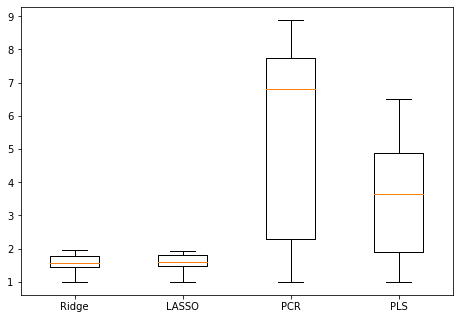

In [34]:
RMSPE_Ridge = Ridge_MSPE / min(Ridge_MSPE)
RMSPE_LASSO = LASSO_MSPE / min(LASSO_MSPE)
RMSPE_PCR = PCR_MSPE / min(PCR_MSPE)
RMSPE_PLS = PLS_MSPE / min(PLS_MSPE)

print('RMSPE average for Ridge: ', np.mean(RMSPE_Ridge))
print('RMSPE average for LASSO: ', np.mean(RMSPE_LASSO))
print('RMSPE average for PCR: ', np.mean(RMSPE_PCR))
print('RMSPE average for PLS: ', np.mean(RMSPE_PLS))

print('RMSPE SD for Ridge: ', np.std(RMSPE_Ridge))
print('RMSPE SD for LASSO: ', np.std(RMSPE_LASSO))
print('RMSPE SD for PCR: ', np.std(RMSPE_PCR))
print('RMSPE SD for PLS: ', np.std(RMSPE_PLS))

RMSPEs = [RMSPE_Ridge, RMSPE_LASSO, RMSPE_PCR, RMSPE_PLS]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot(RMSPEs)
ax.set_xticklabels(['Ridge','LASSO','PCR', 'PLS'])